In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from IPython.display import display, HTML


In [4]:
def data_analysis(data_set):
    print("Dataset :", data_set)
    data = pd.read_csv(data_set+"/train.csv")
    data=data.rename(columns={"text":"Text", "l1": "Cat1", "l2": "Cat2", "l3": "Cat3"})


    display(data.head())
    def plot_histo(column):
        text_len=data[column].str.len()
        plt.hist(text_len, bins = text_len.max())
        plt.xlabel("Token length")
        plt.ylabel("Amount")
        plt.title("Token lenght for {}: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(column, text_len.min(), text_len.max(), text_len.mean()))

    def plot_histo_targets(column):
        plt.hist(data[column].str.replace(' ', '\n '), bins = len(pd.Categorical(data[column]).categories)*2, align="left");    
        plt.xlabel("Label")
        plt.ylabel("Amount of appearances")
        name, count = np.unique(data[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
        plt.title("Amount of appearances for {}: \n Minimal: {} appears {} times \n Maximal: {} appears {} times".format(column, name[count.argmin()], count.min(), name[count.argmax()], count.max()))
    def get_info(column):
        name, count = np.unique(data[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
        print("Amount of appearances for {}: \n * unique values {}  \n * Minimal: {} appears {} times  \n * Maximal: {} appears {} times  \n * in average {:.2f} times.  \n ".format(column, len(count) , name[count.argmin()], count.min(), name[count.argmax()], count.max(), count.mean()))
    print("Training data \nContains {} examples".format(data.shape[0]))
    get_info("Cat1")

    get_info("Cat2")

    get_info("Cat3")

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, 1)
    plot_histo("Text")
    plt.subplot(1, 4, 2)
    plot_histo("Cat1")
    plt.subplot(1, 4, 3)
    plot_histo("Cat2")
    plt.subplot(1, 4, 4)
    plot_histo("Cat3")

    plt.savefig("./visualizations/"+data_set+"/Data_analysis.svg", dpi=200, format="svg")
    plt.show()
    
    test = pd.read_csv(data_set+"/test.csv")
    test=test.rename(columns={"text":"Text", "l1": "Cat1", "l2": "Cat2", "l3": "Cat3"})

    def plot_histo(column):
        text_len=test[column].str.len()
        plt.hist(text_len, bins = text_len.max())
        plt.xlabel("Token length")
        plt.ylabel("Amount")
        plt.title("Token lenght for {}: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(column, text_len.min(), text_len.max(), text_len.mean()))

    def plot_histo_targets(column):
        plt.hist(test[column].str.replace(' ', '\n '), bins = len(pd.Categorical(test[column]).categories)*2, align="left");    
        plt.xlabel("Label")
        plt.ylabel("Amount of appearances")
        name, count = np.unique(test[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
        plt.title("Amount of appearances for {}: \n Minimal: {} appears {} times \n Maximal: {} appears {} times".format(column, name[count.argmin()], count.min(), name[count.argmax()], count.max()))
    def get_info(column):
        name, count = np.unique(test[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
        print("Amount of appearances for {}: \n * unique values {}  \n * Minimal: {} appears {} times  \n * Maximal: {} appears {} times  \n * in average {:.2f} times.  \n ".format(column, len(count) , name[count.argmin()], count.min(), name[count.argmax()], count.max(), count.mean()))

    print("Test data \nContains {} examples".format(test.shape[0]))
    get_info("Cat1")

    get_info("Cat2")

    get_info("Cat3")
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, 1)
    plot_histo("Text")
    plt.subplot(1, 4, 2)
    plot_histo("Cat1")
    plt.subplot(1, 4, 3)
    plot_histo("Cat2")
    plt.subplot(1, 4, 4)
    plot_histo("Cat3")

    plt.savefig("./visualizations/"+data_set+"/Data_analysis_test.svg", dpi=200, format="svg")
    plt.show()

Dataset : amazon


,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


Training data 
Contains 40000 examples
Amount of appearances for Cat1: 
 * unique values 6  
 * Minimal: grocery gourmet food appears 3617 times  
 * Maximal: toys games appears 10266 times  
 * in average 6666.67 times.  
 
Amount of appearances for Cat2: 
 * unique values 64  
 * Minimal: small animals appears 29 times  
 * Maximal: personal care appears 2852 times  
 * in average 625.00 times.  
 
Amount of appearances for Cat3: 
 * unique values 464  
 * Minimal: aprons smocks appears 1 times  
 * Maximal: unknown appears 2262 times  
 * in average 86.21 times.  
 


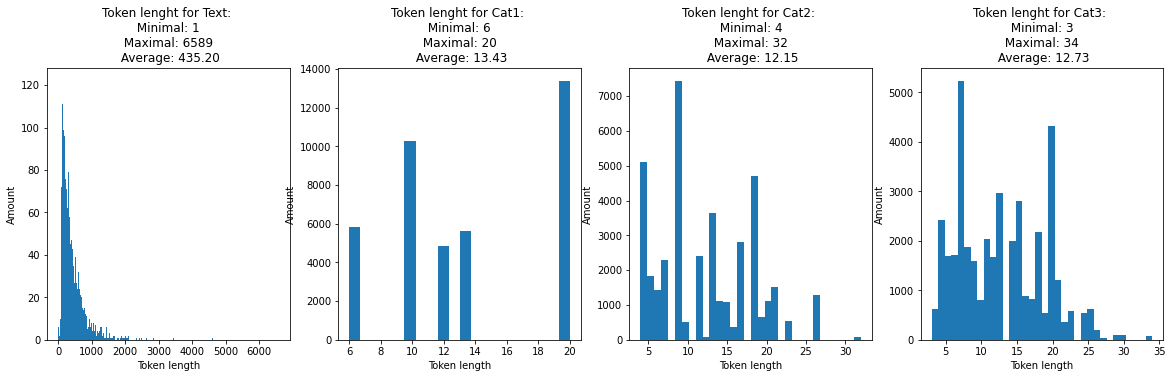

Test data 
Contains 10000 examples
Amount of appearances for Cat1: 
 * unique values 6  
 * Minimal: baby products appears 698 times  
 * Maximal: health personal care appears 2992 times  
 * in average 1666.67 times.  
 
Amount of appearances for Cat2: 
 * unique values 64  
 * Minimal: baby food appears 2 times  
 * Maximal: nutrition wellness appears 904 times  
 * in average 156.25 times.  
 
Amount of appearances for Cat3: 
 * unique values 377  
 * Minimal: aquarium hoods appears 1 times  
 * Maximal: vitamins supplements appears 665 times  
 * in average 26.53 times.  
 


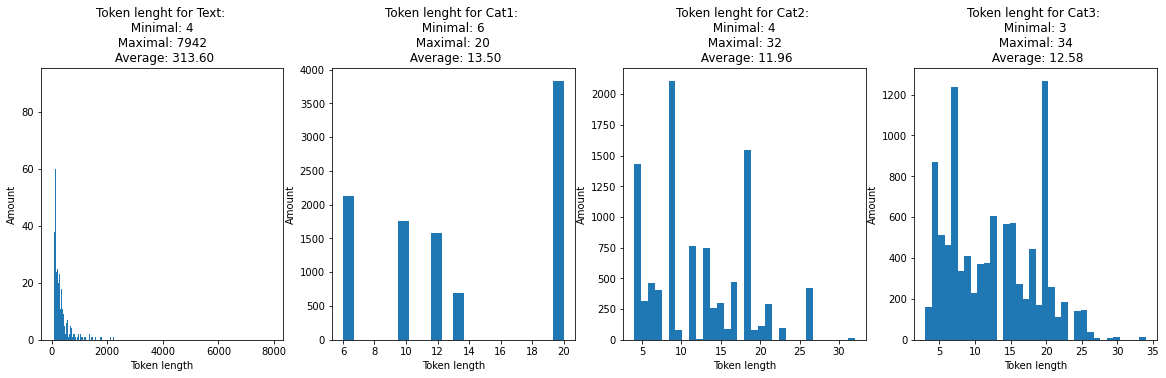

In [5]:
data_analysis("amazon")

Dataset : dbpedia


,Text,Cat1,Cat2,Cat3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


Training data 
Contains 240942 examples
Amount of appearances for Cat1: 
 * unique values 9  
 * Minimal: Device appears 248 times  
 * Maximal: Agent appears 124798 times  
 * in average 26771.33 times.  
 
Amount of appearances for Cat2: 
 * unique values 70  
 * Minimal: Database appears 129 times  
 * Maximal: Athlete appears 31111 times  
 * in average 3442.03 times.  
 
Amount of appearances for Cat3: 
 * unique values 219  
 * Minimal: BiologicalDatabase appears 129 times  
 * Maximal: AcademicJournal appears 1924 times  
 * in average 1100.19 times.  
 


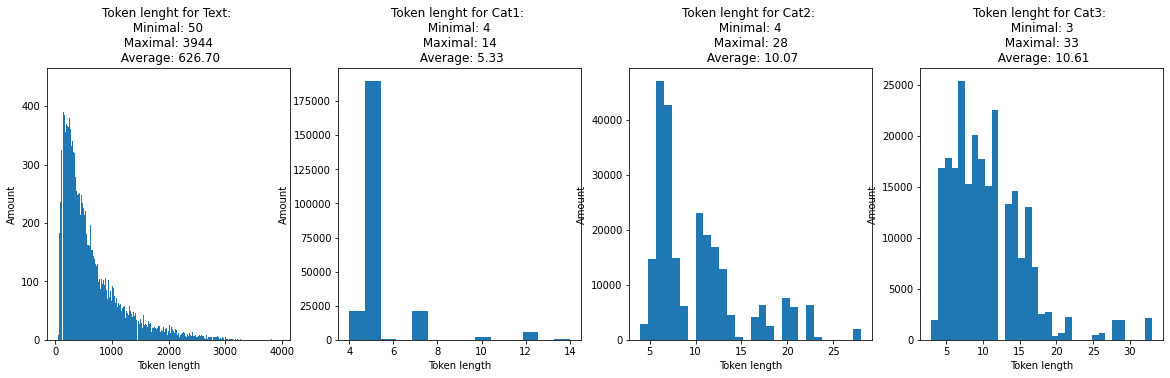

Test data 
Contains 60794 examples
Amount of appearances for Cat1: 
 * unique values 9  
 * Minimal: Device appears 62 times  
 * Maximal: Agent appears 31495 times  
 * in average 6754.89 times.  
 
Amount of appearances for Cat2: 
 * unique values 70  
 * Minimal: Database appears 33 times  
 * Maximal: Athlete appears 7855 times  
 * in average 868.49 times.  
 
Amount of appearances for Cat3: 
 * unique values 219  
 * Minimal: BiologicalDatabase appears 33 times  
 * Maximal: AcademicJournal appears 485 times  
 * in average 277.60 times.  
 


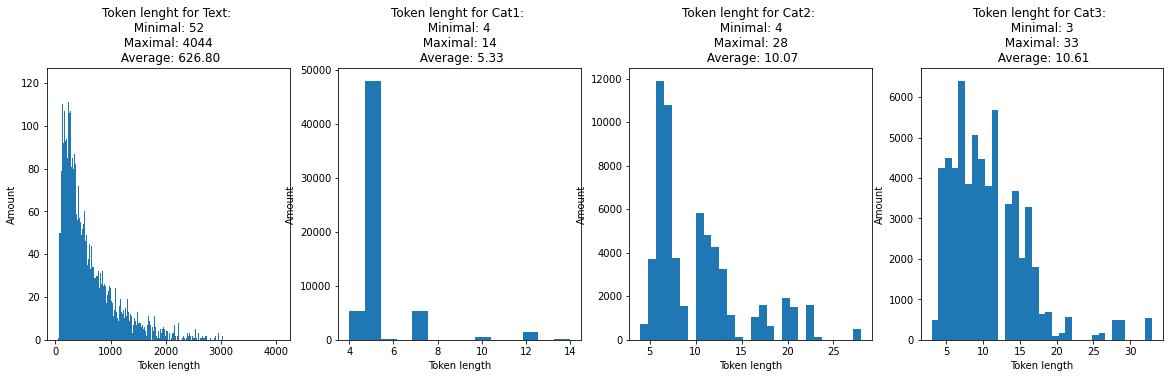

In [6]:
data_analysis("dbpedia")

# Analisis when constrained to max length 100

In [11]:
def plot_histo_lim(dataset,column,max_len):
    text_len=np.array([x if x<=max_len else max_len for x in dataset[column].str.len()])
    plt.hist(text_len, bins = text_len.max())
    plt.xlabel("Token length")
    plt.ylabel("Amount")
    plt.yscale("log")
    plt.title("Used token lenght for {} constrained to {}: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(column,max_len, text_len.min(), text_len.max(), text_len.mean()))

def plot_histo_label_lim(dataset,column,cats,max_len):
    df_empty = pd.DataFrame({'A' : []})
    for cat in cats:
        df_empty['Text'] = dataset[cat].str.cat(dataset['Text'], sep=". ")
        
    text_len=np.array([x if x<=max_len else max_len for x in df_empty['Text'].str.len()])
    plt.hist(text_len, bins = text_len.max())
    plt.xlabel("Token length")
    plt.ylabel("Amount")
    plt.yscale("log")
    plt.title("Used token lenght for {}, {} as input constrained to {}: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(cats, column, max_len, text_len.min(), text_len.max(), text_len.mean()))
    
    
def plot_histo(dataset,column,max_len):
    text_len= dataset[column].str.len()
    n,_,_=plt.hist(text_len, bins = text_len.max())
    plt.vlines(max_len,0,n.max(),color='r')
    plt.xlabel("Token length")
    plt.ylabel("Amount")
    plt.yscale("log")
    plt.title("Token lenght for {}, indicating {} as max len: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(column,max_len, text_len.min(), text_len.max(), text_len.mean()))

def plot_histo_label(dataset,column,cats,max_len):
    df_empty = pd.DataFrame({'A' : []})
    for cat in cats:
        df_empty['Text'] = dataset[cat].str.cat(dataset['Text'], sep=". ")
        
    text_len= df_empty['Text'].str.len()
    n,_,_=plt.hist(text_len, bins = text_len.max())
    plt.vlines(max_len,0,n.max(),color='r')
    plt.xlabel("Token length")
    plt.ylabel("Amount")
    plt.yscale("log")
    plt.title("Token lenght for {}, {} as input, indicating {} as max len: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(cats, column, max_len, text_len.min(), text_len.max(), text_len.mean()))

def plot_histo_targets(dataset, column):

    plt.ylabel("Label")
    plt.xscale("log")
    plt.xlabel("Amount of appearances")
    name, count = np.unique(dataset[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
    plt.title("Amount of appearances for {}: \n Minimal: {} appears {} times \n Maximal: {} appears {} times".format(column, name[count.argmin()], count.min(), name[count.argmax()], count.max()))
    y_pos = np.arange(len(name))

    bar_plot=plt.barh(y_pos, count, align='center')

    plt.yticks(y_pos, name)

    #plt.show()
    

def plot_histo_targets_len(dataset, column):
    plt.ylabel("Label")
    plt.xlabel("Token lenght")
    name, count = np.unique(dataset[column], return_index=False, return_inverse=False, return_counts=True, axis=None)
    lengths=np.array([len(x) for x in name])
    plt.title("Token length for {}: \n Minimal: {} is {} tokens long \n Maximal: {} is {} tokens long".format(column, name[lengths.argmin()], lengths.min(), name[lengths.argmax()], lengths.max()))
    y_pos = np.arange(len(name))

    bar_plot=plt.barh(y_pos, lengths, align='center')

    plt.yticks(y_pos, name)
    
    

def plot_histo_lost(dataset,column,cats,max_len):
    df_empty = pd.DataFrame({'A' : []})
    if cats==[]:
        df_empty['Text'] = dataset['Text']
    else:
        for cat in cats:
            df_empty['Text'] = dataset[cat].str.cat(dataset['Text'], sep=". ")
        
    text_len=np.array([x-max_len  for x in df_empty['Text'].str.len() if x>max_len])
    plt.hist(text_len, bins = text_len.max())
    plt.xlabel("Token length")
    plt.ylabel("Amount")
    plt.yscale("log")
    plt.title("Token lenght of lost information for {}, {} as input constrained to {}: \n Minimal: {} \n Maximal: {} \n Average: {:.2f}".format(cats, column, max_len, text_len.min(), text_len.max(), text_len.mean()))
    

def data_analysis_fixed_len(data_set,max_len=100):
    print("Dataset :", data_set)
    data = pd.read_csv(data_set+"/train.csv")
    data=data.rename(columns={"text":"Text", "l1": "Cat1", "l2": "Cat2", "l3": "Cat3"})
    data=data[['Text', "Cat1", "Cat2", "Cat3"]]

    display(data.head())

    print("Training data \nContains {} examples".format(data.shape[0]))
    
    spec=gridspec.GridSpec(5,3, wspace=0.5, hspace=0.5)
    
    fig= plt.figure(figsize=(40, 25))
  
    fig.add_subplot(spec[0, 0])
    plot_histo_targets(data,"Cat1")
    fig.add_subplot(spec[0, 1])
    plot_histo_targets(data,"Cat2")
    fig.add_subplot(spec[0, 2])
    plot_histo_targets(data,"Cat3")

    
    fig.add_subplot(spec[1, 0])
    plot_histo_targets_len(data,"Cat1")
    fig.add_subplot(spec[1, 1])
    plot_histo_targets_len(data,"Cat2")
    fig.add_subplot(spec[1, 2])
    plot_histo_targets_len(data,"Cat3")
    
    fig.add_subplot(spec[2, 0])
    plot_histo(data,"Text",max_len)
    fig.add_subplot(spec[2, 1])
    plot_histo_label(data,"Text",["Cat1"],max_len)
    fig.add_subplot(spec[2, 2])
    plot_histo_label(data,"Text",["Cat1","Cat2"],max_len)
    
    fig.add_subplot(spec[3, 0])
    plot_histo_lim(data,"Text",max_len)
    fig.add_subplot(spec[3, 1])
    plot_histo_label_lim(data,"Text",["Cat1"],max_len)
    fig.add_subplot(spec[3, 2])
    plot_histo_label_lim(data,"Text",["Cat1","Cat2"],max_len)
    
    fig.add_subplot(spec[4, 0])
    plot_histo_lost(data,"Text",[],max_len)
    fig.add_subplot(spec[4, 1])
    plot_histo_lost(data,"Text",["Cat1"],max_len)
    fig.add_subplot(spec[4, 2])
    plot_histo_lost(data,"Text",["Cat1","Cat2"],max_len)


    plt.show()
    
    test = pd.read_csv(data_set+"/test.csv")
    test=test.rename(columns={"text":"Text", "l1": "Cat1", "l2": "Cat2", "l3": "Cat3"})
    test=test[['Text', "Cat1", "Cat2", "Cat3"]]


    print("Test data \nContains {} examples".format(test.shape[0]))
  
    fig= plt.figure(figsize=(40, 25))
    
    fig.add_subplot(spec[0, 0])
    plot_histo_targets(test,"Cat1")
    fig.add_subplot(spec[0, 1])
    plot_histo_targets(test,"Cat2")
    fig.add_subplot(spec[0, 2])
    plot_histo_targets(test,"Cat3")

  
    fig.add_subplot(spec[1, 0])
    plot_histo_targets_len(test,"Cat1")
    fig.add_subplot(spec[1, 1])
    plot_histo_targets_len(test,"Cat2")
    fig.add_subplot(spec[1, 2])
    plot_histo_targets_len(test,"Cat3")
    
    
    fig.add_subplot(spec[2, 0])
    plot_histo(test,"Text",max_len)
    fig.add_subplot(spec[2, 1])
    plot_histo_label(test,"Text",["Cat1"],max_len)
    fig.add_subplot(spec[2, 2])
    plot_histo_label(test,"Text",["Cat1","Cat2"],max_len)
    
    
    fig.add_subplot(spec[3, 0])
    plot_histo_lim(test,"Text",max_len)
    fig.add_subplot(spec[3, 1])
    plot_histo_label_lim(test,"Text",["Cat1"],max_len)
    fig.add_subplot(spec[3, 2])
    plot_histo_label_lim(test,"Text",["Cat1","Cat2"],max_len)
    
    fig.add_subplot(spec[4, 0])
    plot_histo_lost(test,"Text",[],max_len)
    fig.add_subplot(spec[4, 1])
    plot_histo_lost(test,"Text",["Cat1"],max_len)
    fig.add_subplot(spec[4, 2])
    plot_histo_lost(test,"Text",["Cat1","Cat2"],max_len)
 

    plt.show()

Dataset : amazon


,Text,Cat1,Cat2,Cat3
0,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


Training data 
Contains 40000 examples


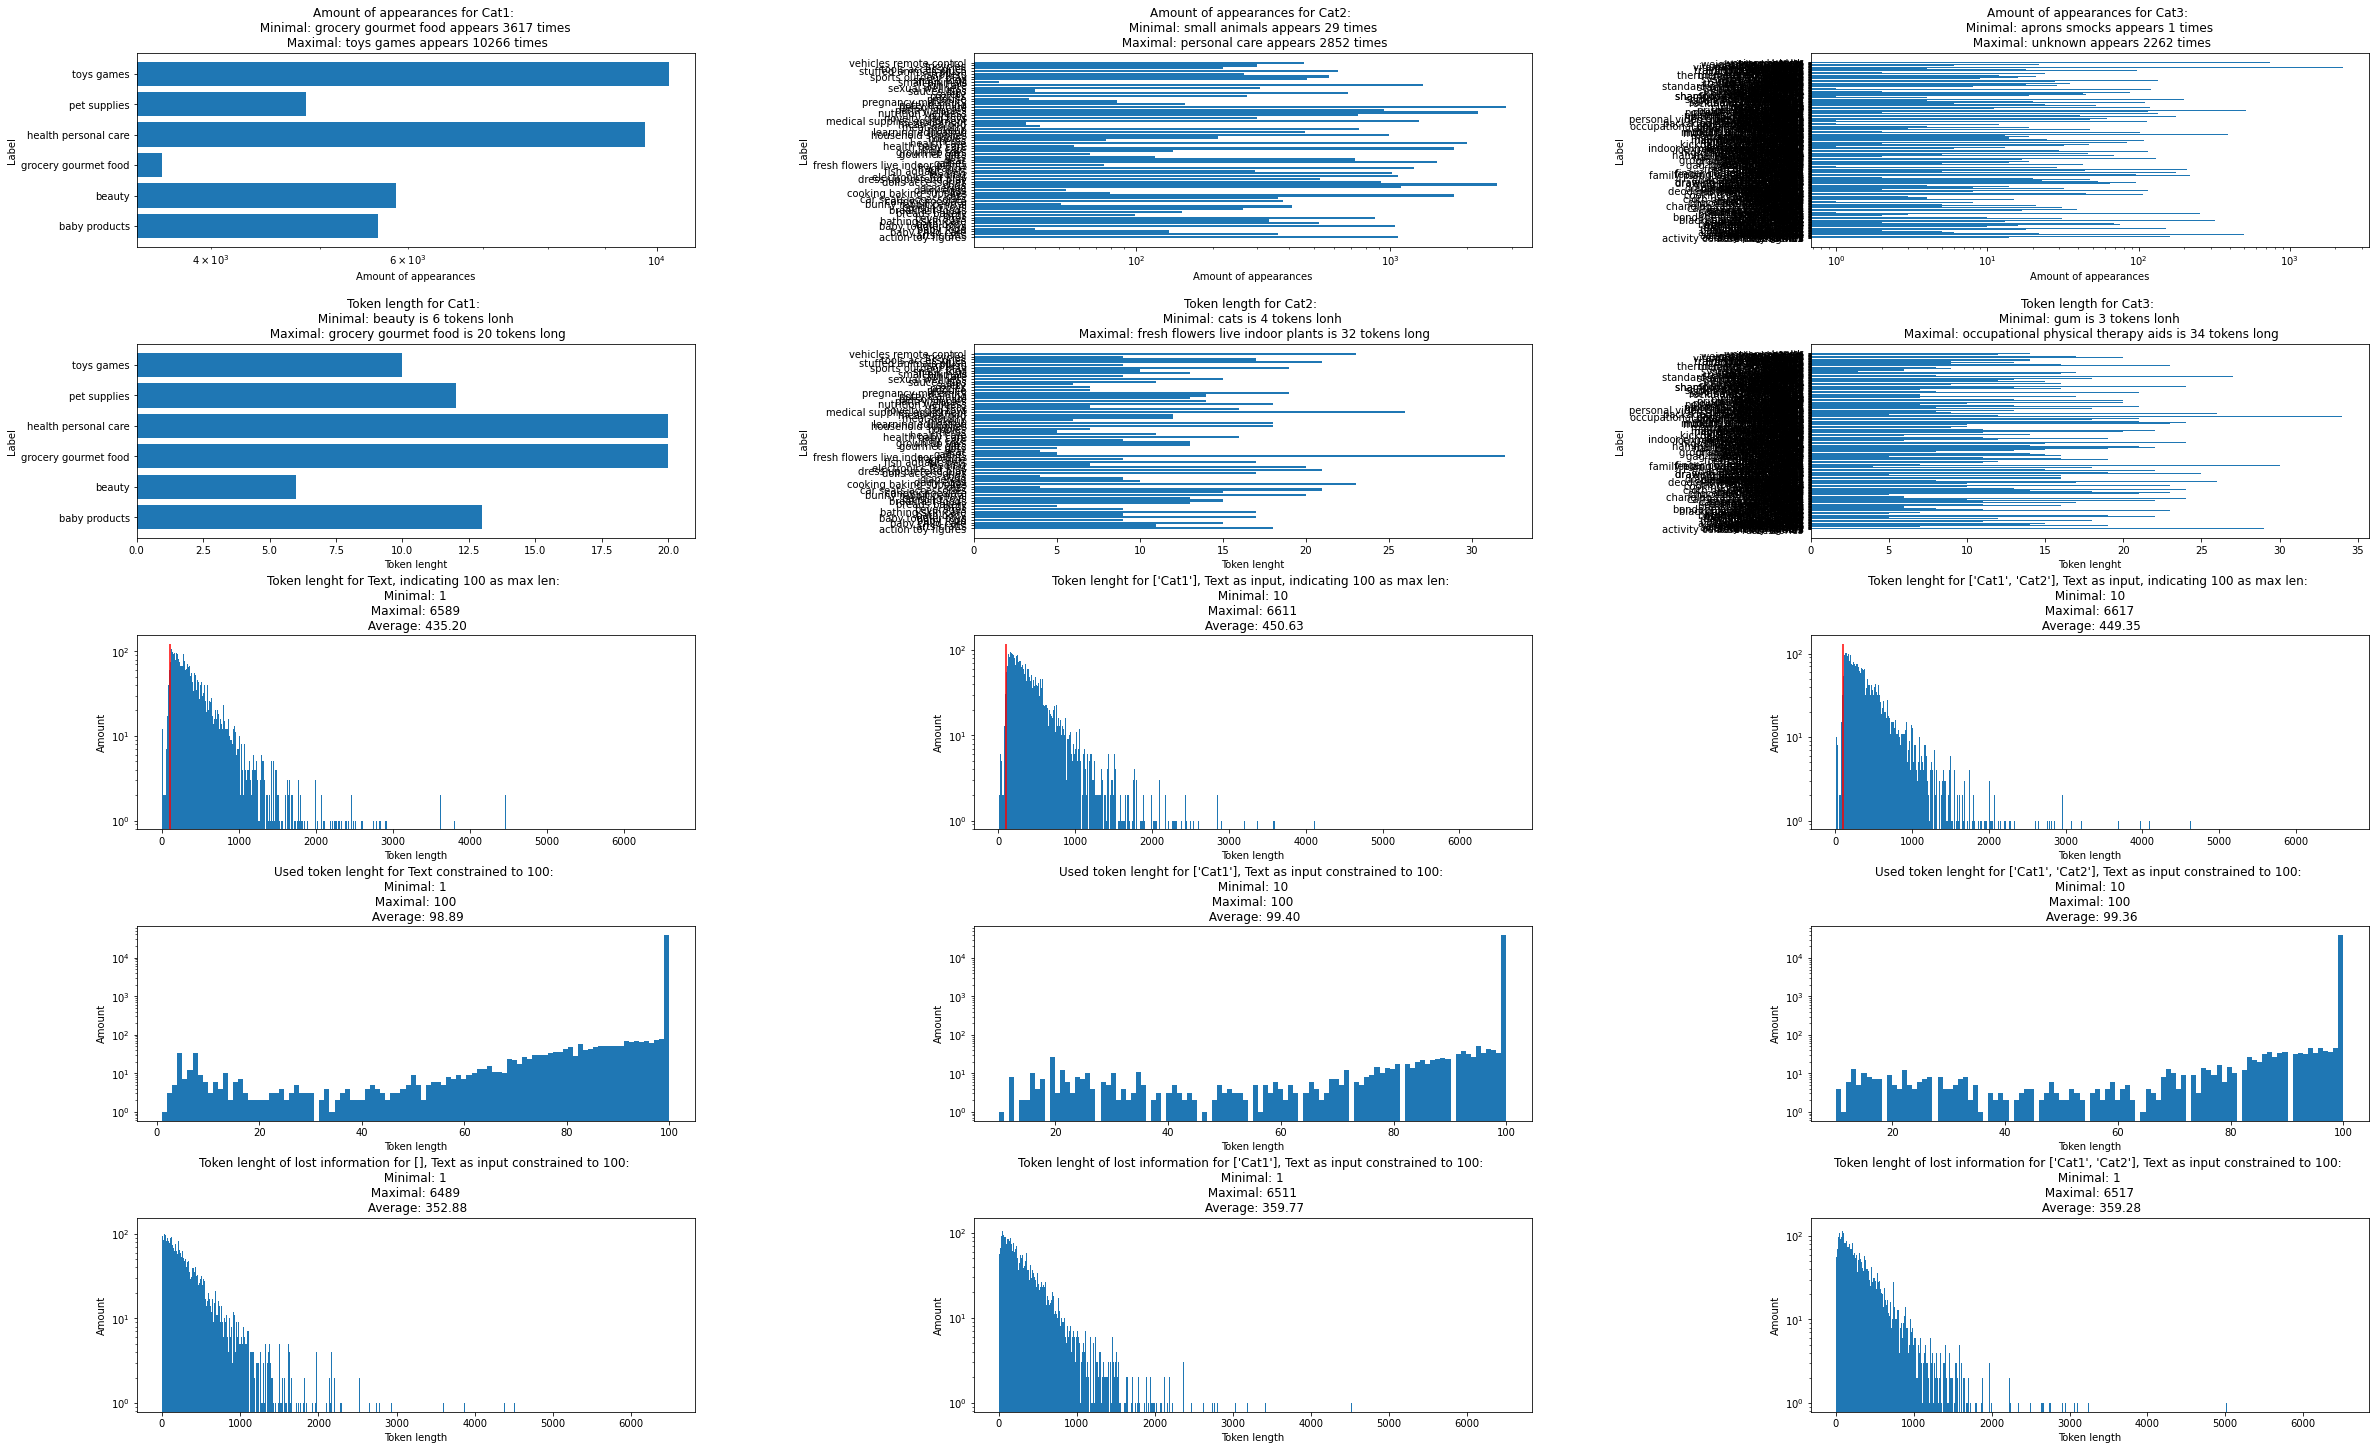

Test data 
Contains 10000 examples


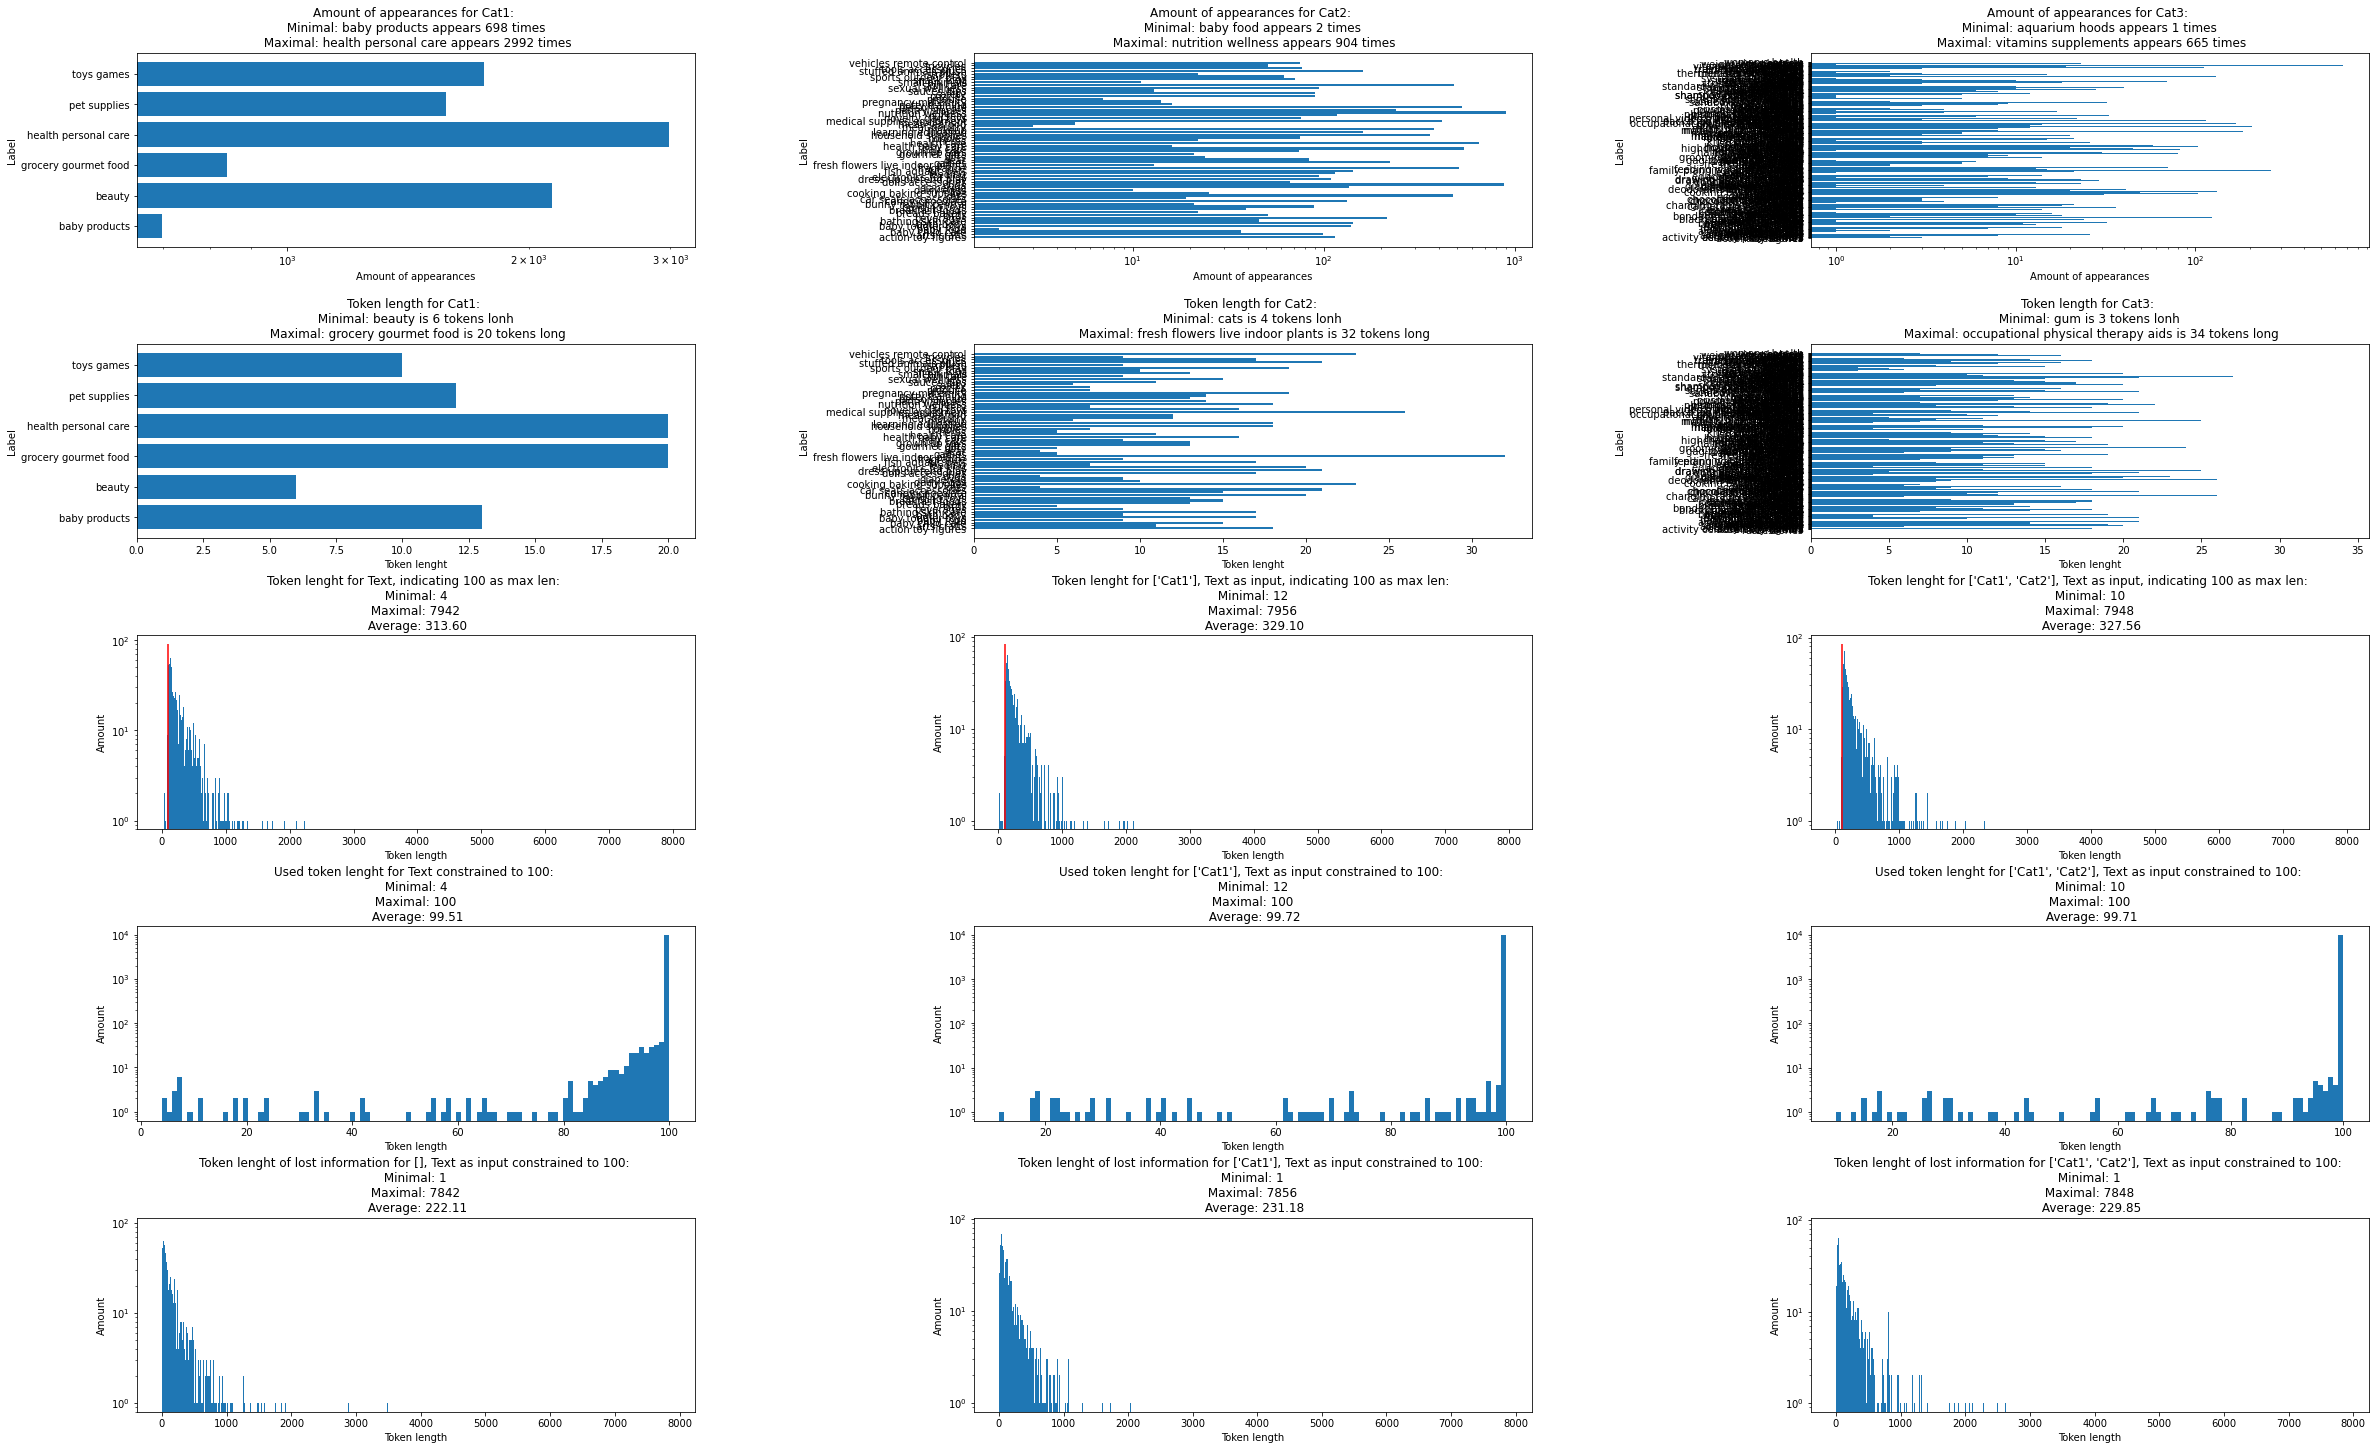

In [12]:
data_analysis_fixed_len("amazon")

Dataset : dbpedia


,Text,Cat1,Cat2,Cat3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


Training data 
Contains 240942 examples


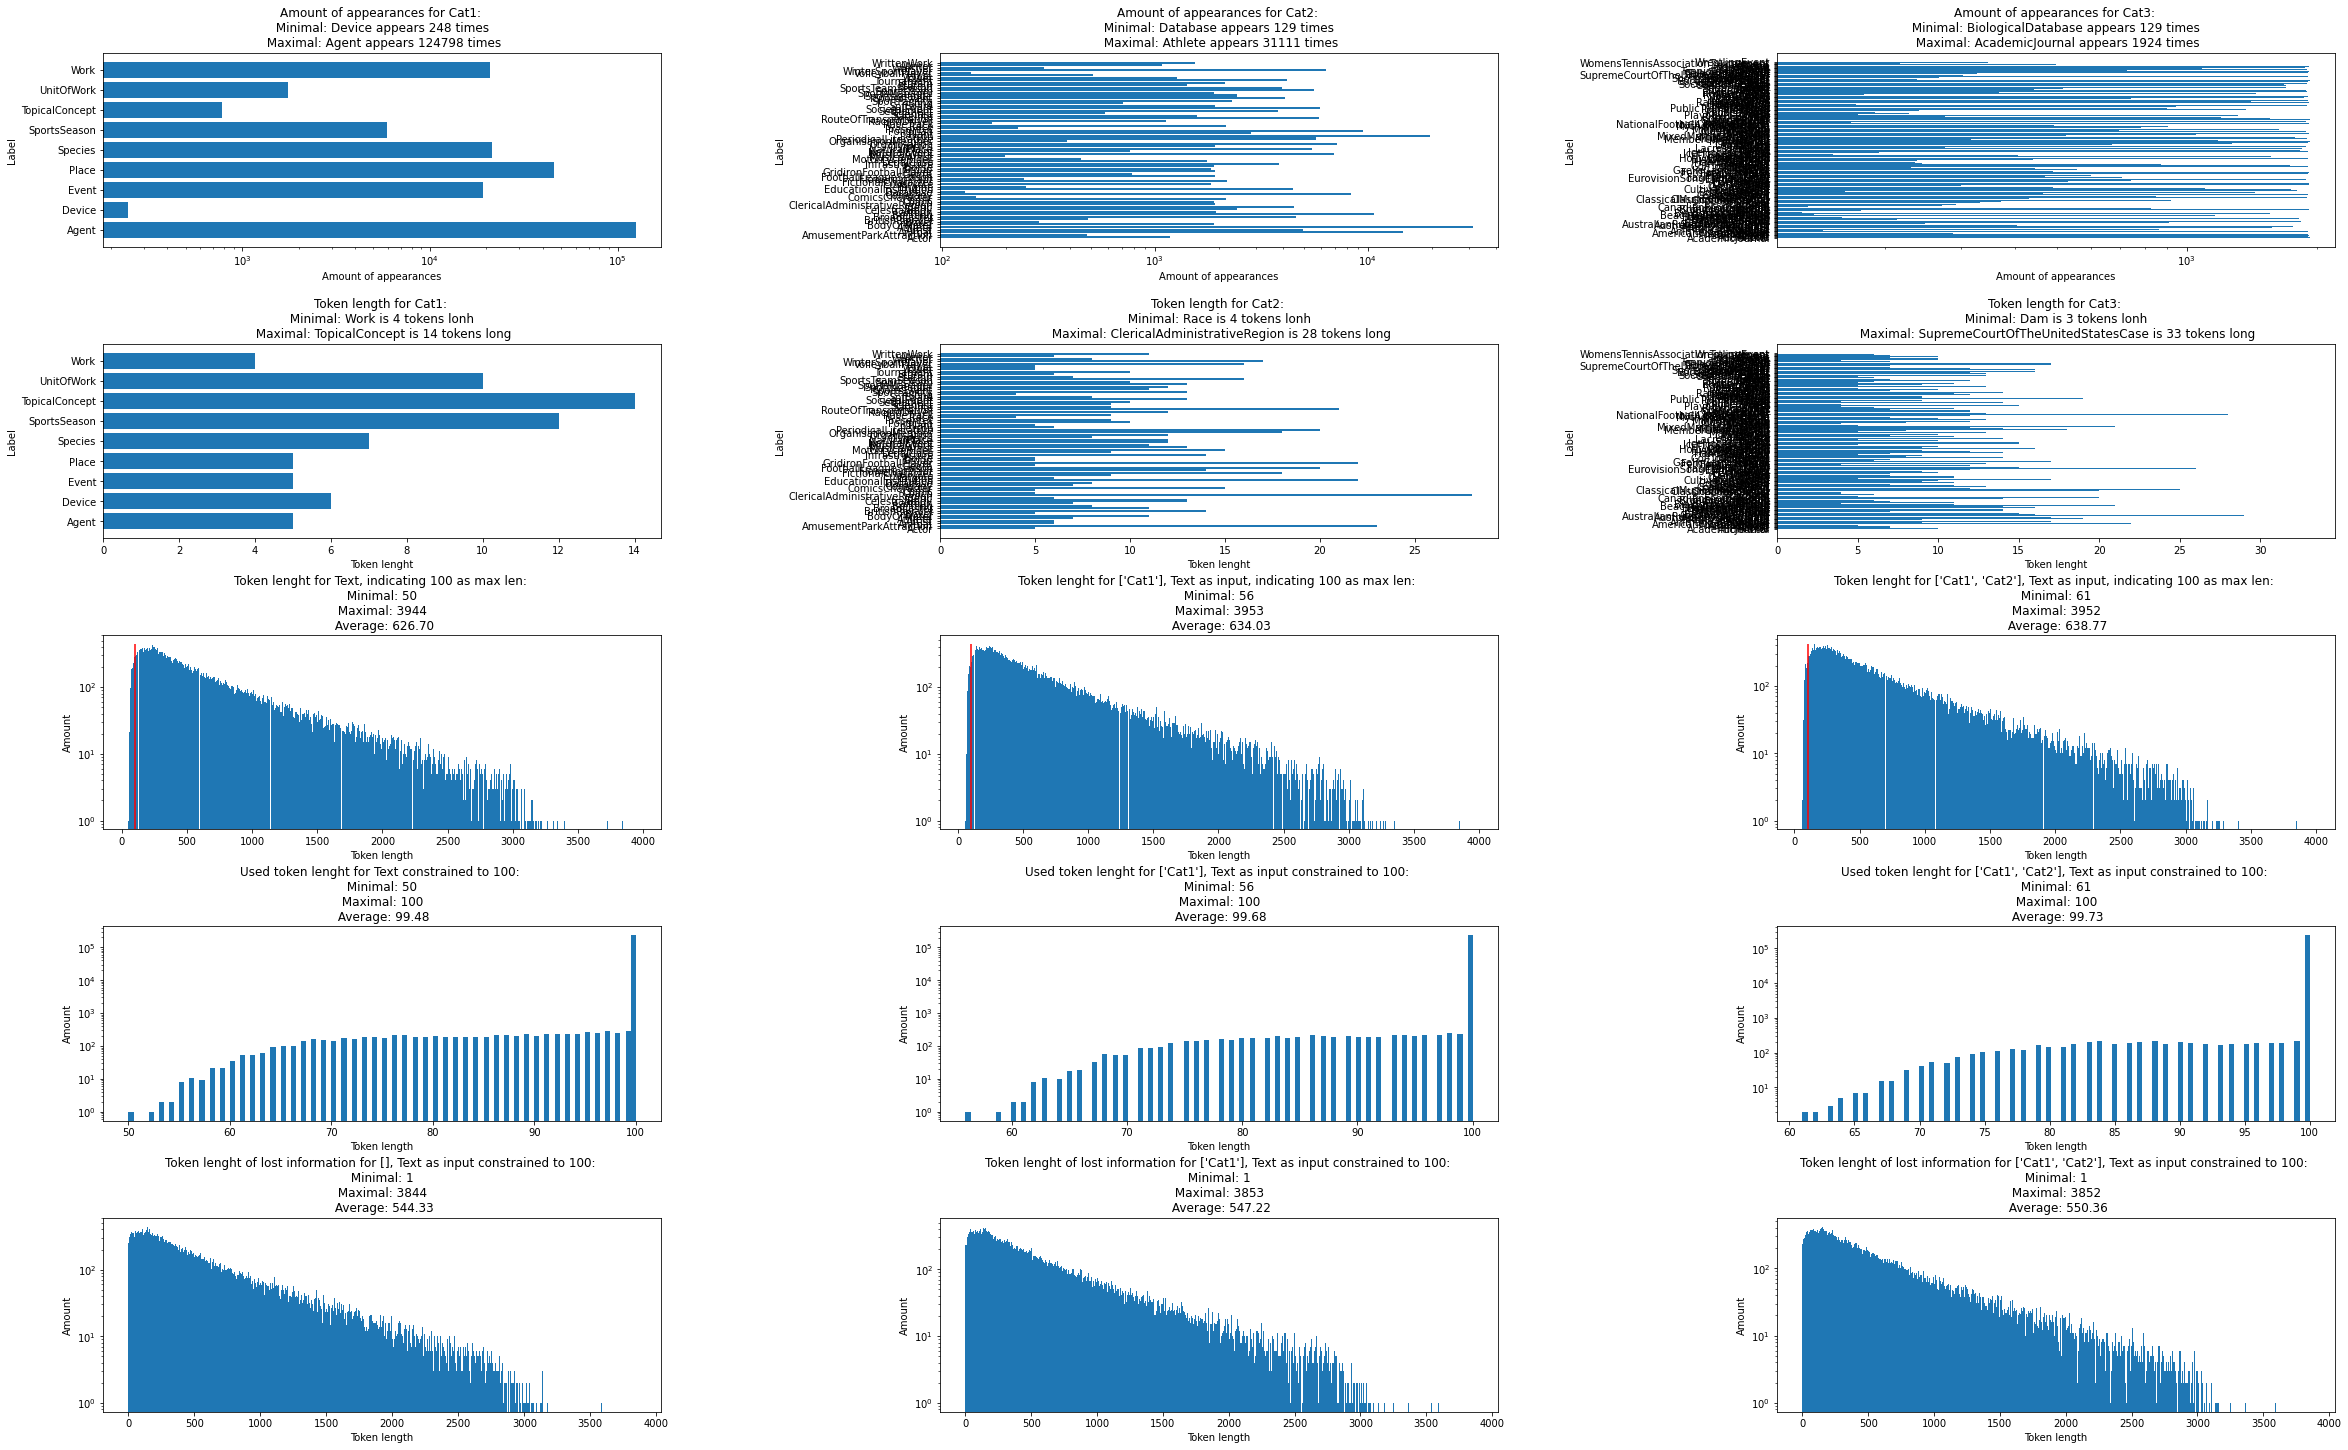

Test data 
Contains 60794 examples


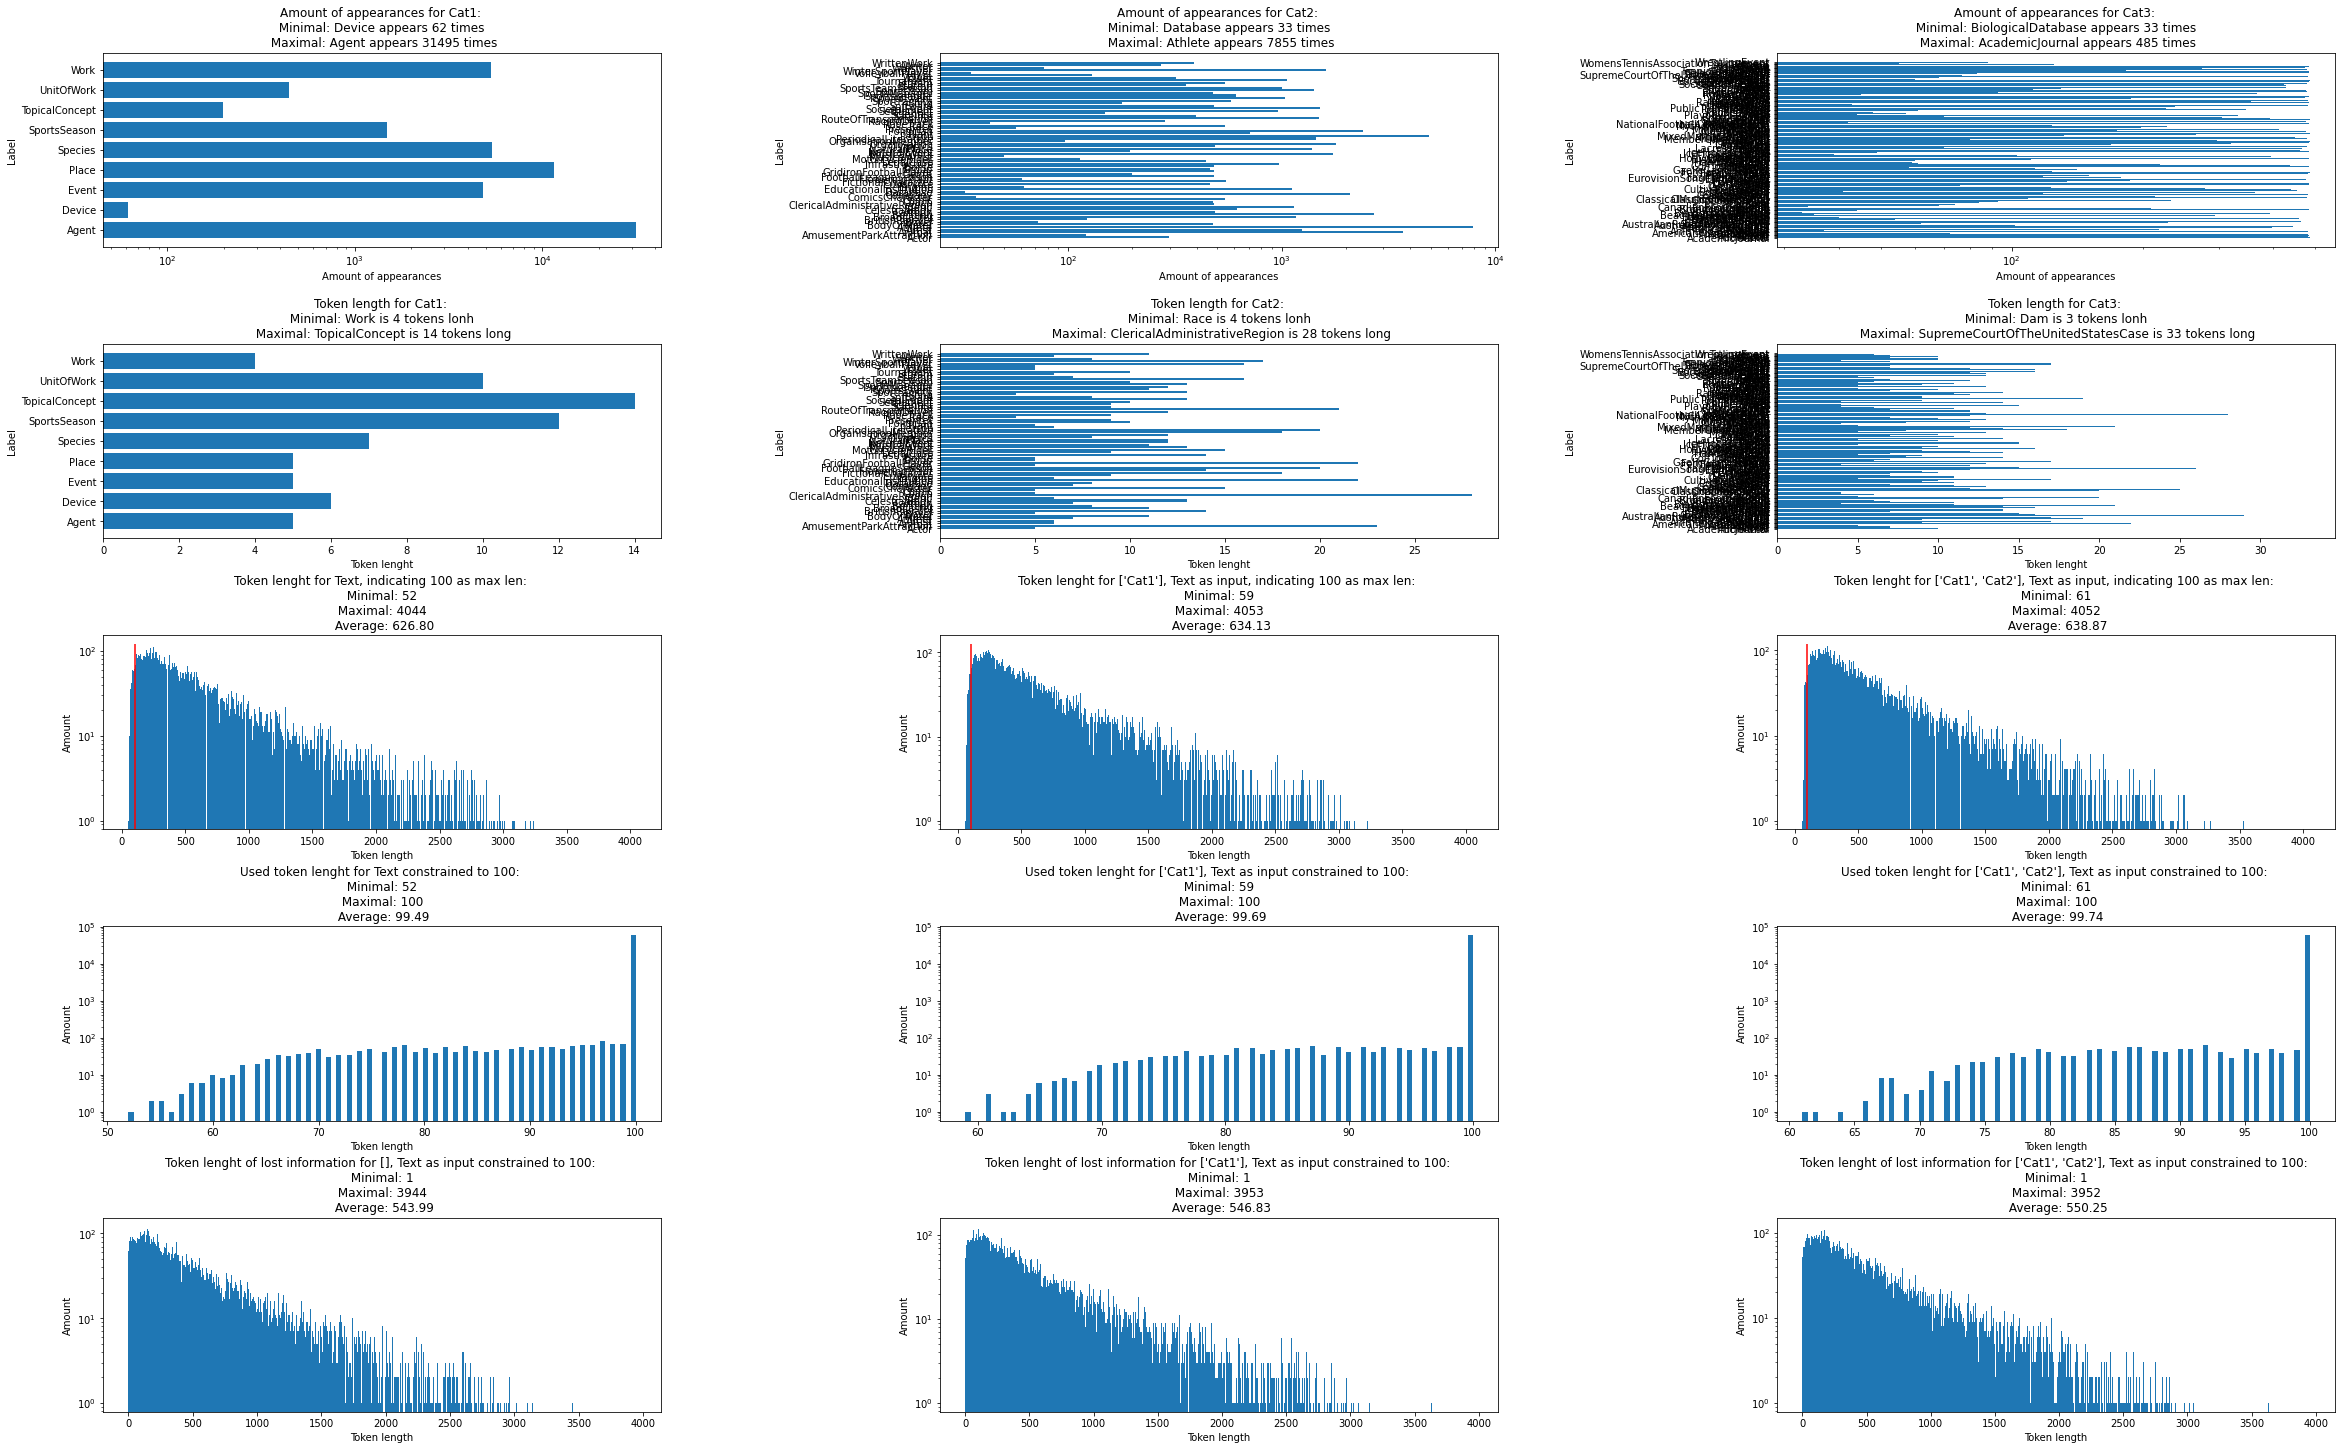

In [13]:
data_analysis_fixed_len("dbpedia")